In [1]:
# Importing Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
from os import listdir
import os
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

I have created a main folder called 'images' containing 2 folders named 'train' and 'test'. 
'train' contains images of each category from 1 to 180 and 'test' contains 181 to 200.
I have deleted 1 common picture across all 3 classes which contains a logo

In [2]:
Train_data_dir=r'images/train'
validation_data_dir=r'images/test'

In [3]:
# Number of classes in the training folder
file = os.listdir(r'images/train')
file

['Jeans (men)', 'Sarees (women)', 'Trousers (men)']

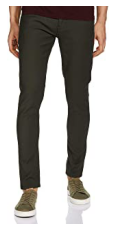

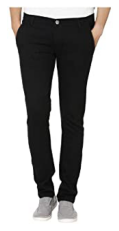

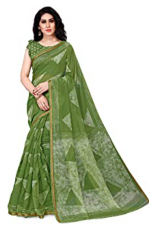

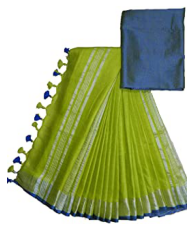

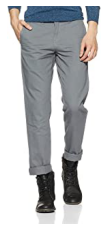

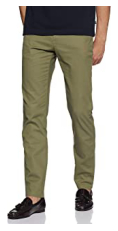

In [4]:
# Let's try to print some of the scrapped images from each category
import matplotlib.image as mpimg
Jeans_train=r'images/train/Jeans (men)'
Saree_train=r'images/train/Sarees (women)'
Trouser_train=r'images/train/Trousers (men)'


Dir_train=[Jeans_train, Saree_train, Trouser_train]
for dirs in Dir_train:
    k=listdir(dirs)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [5]:
# Defining Dimensions for the image to be input and then loading the images
input_shape=(576,576,3)
img_width=576
img_height=576
nb_train_samples=179
nb_validation_samples=20
batch_size=8
epoch=150

In [6]:
# Training Data Generator( Data Augmentation on Training Images)

Train_generator_augmented=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Train_generator=Train_generator_augmented.flow_from_directory(Train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Validation Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 537 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [7]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 574, 574, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 574, 574, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 287, 287, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 287, 287, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 285, 285, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 285, 285, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 142, 142, 32)      0

In [8]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [10]:
# Fitting the Training Data
history = model.fit_generator(
    Train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/150
22/22 [==============================] - 56s 2s/step - loss: 3.4469 - accuracy: 0.3693 - val_loss: 1.0983 - val_accuracy: 0.3750

Epoch 00001: val_accuracy improved from -inf to 0.37500, saving model to best.h5
Epoch 2/150
22/22 [==============================] - 55s 2s/step - loss: 1.1011 - accuracy: 0.3580 - val_loss: 1.0865 - val_accuracy: 0.4375

Epoch 00002: val_accuracy improved from 0.37500 to 0.43750, saving model to best.h5
Epoch 3/150
22/22 [==============================] - 54s 2s/step - loss: 1.0654 - accuracy: 0.4716 - val_loss: 1.0268 - val_accuracy: 0.6250

Epoch 00003: val_accuracy improved from 0.43750 to 0.62500, saving model to best.h5
Epoch 4/150
22/22 [==============================] - 54s 2s/step - loss: 0.7789 - accuracy: 0.6534 - val_loss: 0.6708 - val_accuracy: 0.7500

Epoch 00004: val_accuracy improved from 0.62500 to 0.75000, saving model to best.h5
Epoch 5/150
22/22 [==============================] - 53s 2s/step - loss: 0.8085 - accuracy: 0.6095 


Epoch 00041: val_accuracy did not improve from 0.93750
Epoch 42/150
22/22 [==============================] - 47s 2s/step - loss: 0.3617 - accuracy: 0.8284 - val_loss: 0.5731 - val_accuracy: 0.7500

Epoch 00042: val_accuracy did not improve from 0.93750
Epoch 43/150
22/22 [==============================] - 48s 2s/step - loss: 0.4445 - accuracy: 0.7898 - val_loss: 0.5923 - val_accuracy: 0.6250

Epoch 00043: val_accuracy did not improve from 0.93750
Epoch 44/150
22/22 [==============================] - 50s 2s/step - loss: 0.4978 - accuracy: 0.7670 - val_loss: 0.6449 - val_accuracy: 0.8750

Epoch 00044: val_accuracy did not improve from 0.93750
Epoch 45/150
22/22 [==============================] - 49s 2s/step - loss: 0.3963 - accuracy: 0.7955 - val_loss: 0.4586 - val_accuracy: 0.8125

Epoch 00045: val_accuracy did not improve from 0.93750
Epoch 46/150
22/22 [==============================] - 48s 2s/step - loss: 0.4386 - accuracy: 0.7898 - val_loss: 0.8140 - val_accuracy: 0.5625

Epoch 000

In [11]:
# Model Evaluation
evl=model.evaluate(validation_generator,steps=1)
print("Test Loss",evl[0])
print("Test Accuracy",evl[1])

1/1 [==============================] - 0s 438ms/step - loss: 0.7305 - accuracy: 0.7500
Test Loss 0.7305119633674622
Test Accuracy 0.75


In [12]:
model.save('best.h5')